Hypothesis:
- increased P300 amplitude in relation to processing of health warning stimuli increased attentional response (Go/NoGo task);

In [1]:
%matplotlib inline

import mne
from mne.channels import find_ch_connectivity, make_1020_channel_selections
from mne.stats import spatio_temporal_cluster_test

from config import (fname,
                    subject_ids, 
                    sessions, 
                    subj_interv, 
                    subj_control, 
                     all_evokeds_interv_1_gng, 
                     all_evokeds_interv_2_gng, 
                     all_evokeds_control_1_gng, 
                     all_evokeds_control_2_gng)

import pandas as pd
import pingouin as pg
import seaborn as sns
import matplotlib.pyplot as plt

import numpy as np

/home/claire/.local/lib/python3.7/site-packages/outdated/utils.py:18: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.3.4, the latest is 0.3.6.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs


In [2]:
for subj in subject_ids:
    for sess in sessions:
        evokeds= mne.read_evokeds(fname.evoked_gng(subject='sub-'+ str(subj), 
                                                  session='ses-'+str(sess)), 
                                    baseline=(None, 0))


        for idx, evoked in enumerate(evokeds):
            evoked.apply_baseline((None, 0))

            if subj in subj_interv:
                if sess == 1:
                    assert len(evokeds) == len(all_evokeds_interv_1_gng)
                    all_evokeds_interv_1_gng[idx].append(evoked)
                    
                elif sess==2:
                    assert len(evokeds) == len(all_evokeds_interv_2_gng)
                    all_evokeds_interv_2_gng[idx].append(evoked)
                
            elif subj in subj_control:
    
                if sess == 1:
                    assert len(evokeds) == len(all_evokeds_control_1_gng)
                    all_evokeds_control_1_gng[idx].append(evoked)
                
                elif sess==2:
                    assert len(evokeds) == len(all_evokeds_control_2_gng)
                    all_evokeds_control_2_gng[idx].append(evoked)

Reading /home/claire/Documents/STUDY/EEG-Tobacco/Skyline-EEG-BIDS/derivatives//go_nogo/sub-146/ses-1/eeg//sub-146_ses-1_gng_ave.fif ...
    Found the data of interest:
        t =    -500.00 ...     600.00 ms (nogo-smoking cue)
        0 CTF compensation matrices available
        nave = 70 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =    -500.00 ...     600.00 ms (nogo-hw)
        0 CTF compensation matrices available
        nave = 76 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =    -500.00 ...     600.00 ms (go-smoking cue)
        0 CTF compensation matrices available
        nave = 204 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying base

        t =    -500.00 ...     600.00 ms (go-smoking cue)
        0 CTF compensation matrices available
        nave = 198 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =    -500.00 ...     600.00 ms (go-hw)
        0 CTF compensation matrices available
        nave = 199 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Reading /home/claire/Documents/STUDY/EEG-Tobacco/Skyline-EEG-BIDS/derivatives//go_nogo/sub-185/ses-1/eeg//sub-185_ses-1_gng_ave.fif ...
    Found the data of interest:
        t =    -500.00 ...     600.00 ms (nogo-smoking cue)
        0 CTF compensation matrices available

    Found the data of interest:
        t =    -500.00 ...     600.00 ms (nogo-smoking cue)
        0 CTF compensation matrices available
        nave = 68 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =    -500.00 ...     600.00 ms (nogo-hw)
        0 CTF compensation matrices available
        nave = 74 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =    -500.00 ...     600.00 ms (go-smoking cue)
        0 CTF compensation matrices available
        nave = 182 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =    -500.00 ...     600.00 ms (go-hw)
        0 CTF compensation

No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =    -500.00 ...     600.00 ms (go-hw)
        0 CTF compensation matrices available
        nave = 183 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Reading /home/claire/Documents/STUDY/EEG-Tobacco/Skyline-EEG-BIDS/derivatives//go_nogo/sub-278/ses-2/eeg//sub-278_ses-2_gng_ave.fif ...
    Found the data of interest:
        t =    -500.00 ...     600.00 ms (nogo-smoking cue)
        0 CTF compensation matrices available
        nave = 80 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline cor

        0 CTF compensation matrices available
        nave = 77 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =    -500.00 ...     600.00 ms (nogo-hw)
        0 CTF compensation matrices available
        nave = 77 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =    -500.00 ...     600.00 ms (go-smoking cue)
        0 CTF compensation matrices available
        nave = 202 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =    -500.00 ...     600.00 ms (go-hw)
        0 CTF compensation matrices available
        nave = 204 - aspect type = 100
No projector specified for this d

Applying baseline correction (mode: mean)
    Found the data of interest:
        t =    -500.00 ...     600.00 ms (go-hw)
        0 CTF compensation matrices available
        nave = 189 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Reading /home/claire/Documents/STUDY/EEG-Tobacco/Skyline-EEG-BIDS/derivatives//go_nogo/sub-375/ses-1/eeg//sub-375_ses-1_gng_ave.fif ...
    Found the data of interest:
        t =    -500.00 ...     600.00 ms (nogo-smoking cue)
        0 CTF compensation matrices available
        nave = 65 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =    -500.00 ...    

        nave = 79 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =    -500.00 ...     600.00 ms (nogo-hw)
        0 CTF compensation matrices available
        nave = 79 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =    -500.00 ...     600.00 ms (go-smoking cue)
        0 CTF compensation matrices available
        nave = 205 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =    -500.00 ...     600.00 ms (go-hw)
        0 CTF compensation matrices available
        nave = 204 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_pr

    Found the data of interest:
        t =    -500.00 ...     600.00 ms (go-hw)
        0 CTF compensation matrices available
        nave = 196 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Reading /home/claire/Documents/STUDY/EEG-Tobacco/Skyline-EEG-BIDS/derivatives//go_nogo/sub-487/ses-2/eeg//sub-487_ses-2_gng_ave.fif ...
    Found the data of interest:
        t =    -500.00 ...     600.00 ms (nogo-smoking cue)
        0 CTF compensation matrices available
        nave = 77 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =    -500.00 ...     600.00 ms (nogo-hw)
        0 CTF compens

No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =    -500.00 ...     600.00 ms (nogo-hw)
        0 CTF compensation matrices available
        nave = 69 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =    -500.00 ...     600.00 ms (go-smoking cue)
        0 CTF compensation matrices available
        nave = 189 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =    -500.00 ...     600.00 ms (go-hw)
        0 CTF compensation matrices available
        nave = 183 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode

        0 CTF compensation matrices available
        nave = 196 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Reading /home/claire/Documents/STUDY/EEG-Tobacco/Skyline-EEG-BIDS/derivatives//go_nogo/sub-577/ses-1/eeg//sub-577_ses-1_gng_ave.fif ...
    Found the data of interest:
        t =    -500.00 ...     600.00 ms (nogo-smoking cue)
        0 CTF compensation matrices available
        nave = 65 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =    -500.00 ...     600.00 ms (nogo-hw)
        0 CTF compensation matrices available
        nave = 72 - aspect type = 100
No projector speci

Applying baseline correction (mode: mean)
    Found the data of interest:
        t =    -500.00 ...     600.00 ms (nogo-hw)
        0 CTF compensation matrices available
        nave = 76 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =    -500.00 ...     600.00 ms (go-smoking cue)
        0 CTF compensation matrices available
        nave = 196 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =    -500.00 ...     600.00 ms (go-hw)
        0 CTF compensation matrices available
        nave = 182 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mod

        nave = 205 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Reading /home/claire/Documents/STUDY/EEG-Tobacco/Skyline-EEG-BIDS/derivatives//go_nogo/sub-667/ses-2/eeg//sub-667_ses-2_gng_ave.fif ...
    Found the data of interest:
        t =    -500.00 ...     600.00 ms (nogo-smoking cue)
        0 CTF compensation matrices available
        nave = 73 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =    -500.00 ...     600.00 ms (nogo-hw)
        0 CTF compensation matrices available
        nave = 69 - aspect type = 100
No projector specified for this dataset. Please consider the met

    Found the data of interest:
        t =    -500.00 ...     600.00 ms (nogo-hw)
        0 CTF compensation matrices available
        nave = 80 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =    -500.00 ...     600.00 ms (go-smoking cue)
        0 CTF compensation matrices available
        nave = 204 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =    -500.00 ...     600.00 ms (go-hw)
        0 CTF compensation matrices available
        nave = 204 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mod

No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Reading /home/claire/Documents/STUDY/EEG-Tobacco/Skyline-EEG-BIDS/derivatives//go_nogo/sub-726/ses-1/eeg//sub-726_ses-1_gng_ave.fif ...
    Found the data of interest:
        t =    -500.00 ...     600.00 ms (nogo-smoking cue)
        0 CTF compensation matrices available
        nave = 79 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =    -500.00 ...     600.00 ms (nogo-hw)
        0 CTF compensation matrices available
        nave = 81 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline co

        t =    -500.00 ...     600.00 ms (nogo-hw)
        0 CTF compensation matrices available
        nave = 53 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =    -500.00 ...     600.00 ms (go-smoking cue)
        0 CTF compensation matrices available
        nave = 199 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =    -500.00 ...     600.00 ms (go-hw)
        0 CTF compensation matrices available
        nave = 200 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline corre

Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Reading /home/claire/Documents/STUDY/EEG-Tobacco/Skyline-EEG-BIDS/derivatives//go_nogo/sub-754/ses-2/eeg//sub-754_ses-2_gng_ave.fif ...
    Found the data of interest:
        t =    -500.00 ...     600.00 ms (nogo-smoking cue)
        0 CTF compensation matrices available
        nave = 75 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =    -500.00 ...     600.00 ms (nogo-hw)
        0 CTF compensation matrices available
        nave = 78 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =    -500.00 ...   

P300 component following a Health Warning Go trial (P300= 300-500ms)
-----------------------------------------------------------------------

get the P300 on all evoked data in response to health warning as Go stimuli
- HW stim go trials corresponds to index 3 of the all_evokeds lists
- compare P300 amplitude pre and post test for each group

In [4]:
# diff between interv and control at t1
go_hw_diff_t1=mne.combine_evoked([mne.grand_average(all_evokeds_interv_1_gng[3]), 
                                     mne.grand_average(all_evokeds_control_1_gng[3])], 
                                    weights=(1, -1)).apply_baseline(None, 0)

# diff between interv and control at t2
go_hw_diff_t2=mne.combine_evoked([mne.grand_average(all_evokeds_interv_2_gng[3]), 
                                     mne.grand_average(all_evokeds_control_2_gng[3])], 
                                    weights=(1, -1)).apply_baseline(None, 0)


# interv - diff between t1 and t2
go_hw_interv_diff=mne.combine_evoked([mne.grand_average(all_evokeds_interv_1_gng[3]), 
                                     mne.grand_average(all_evokeds_interv_2_gng[3])], 
                                    weights=(1, -1)).apply_baseline(None, 0)

# control - diff between t1 and t2
go_hw_control_diff=mne.combine_evoked([mne.grand_average(all_evokeds_control_1_gng[3]), 
                                     mne.grand_average(all_evokeds_control_2_gng[3])], 
                                    weights=(1, -1)).apply_baseline(None, 0)


Identifying common channels ...
Identifying common channels ...
Identifying common channels ...
Identifying common channels ...
Identifying common channels ...
Identifying common channels ...
Identifying common channels ...
Identifying common channels ...


combining channels using "mean"
combining channels using "mean"


<ipython-input-24-90579af2357c>:8: RuntimeWarning: Only 1 channel in "picks"; cannot combine by method "mean".
  ci=.95


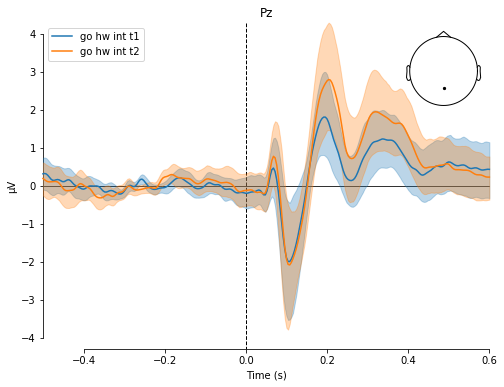

[<Figure size 576x432 with 2 Axes>]

In [24]:
mne.viz.plot_compare_evokeds(
                {#'nogo hw int t1':all_evokeds_interv_1_gng[1], 
                 #'nogo hw int t2':all_evokeds_interv_2_gng[1], 
                'go hw int t1':all_evokeds_interv_1_gng[3], 
                 'go hw int t2':all_evokeds_interv_2_gng[3],}, 
                picks=['Pz'],
                 combine='mean', 
                 ci=.95
                )

combining channels using "mean"
combining channels using "mean"
combining channels using "mean"
combining channels using "mean"


<ipython-input-13-7d7d34c0173b>:8: RuntimeWarning: Only 1 channel in "picks"; cannot combine by method "mean".
  ci=.95


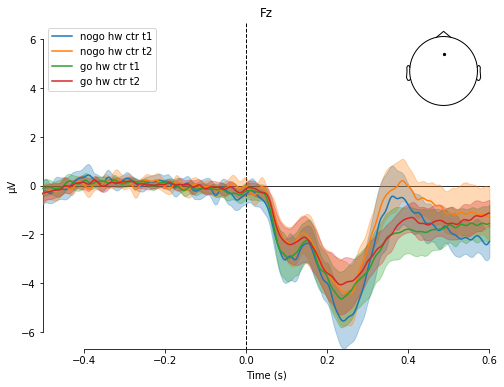

[<Figure size 576x432 with 2 Axes>]

In [13]:
mne.viz.plot_compare_evokeds(
                {'nogo hw ctr t1':all_evokeds_control_1_gng[1], 
                 'nogo hw ctr t2':all_evokeds_control_2_gng[1], 
                'go hw ctr t1':all_evokeds_control_1_gng[3], 
                 'go hw ctr t2':all_evokeds_control_2_gng[3],}, 
                picks=['Fz'],
                 combine='mean', 
                 ci=.95
                )

Intervention group at T1 and T2 - Go HW

combining channels using "mean"
combining channels using "mean"
combining channels using "mean"


<ipython-input-25-4774dcd8570d>:7: RuntimeWarning: Only 1 channel in "picks"; cannot combine by method "mean".
  ci=.95


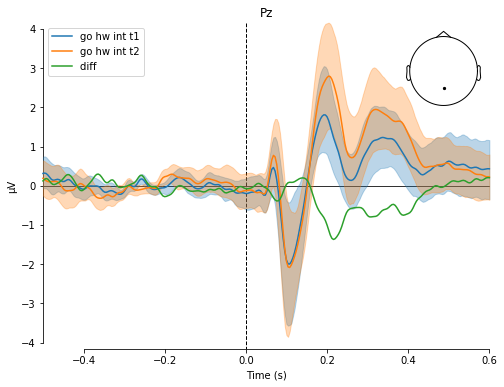

[<Figure size 576x432 with 2 Axes>]

In [25]:
mne.viz.plot_compare_evokeds(
                {'go hw int t1':all_evokeds_interv_1_gng[3], 
                 'go hw int t2':all_evokeds_interv_2_gng[3], 
                 'diff ': go_hw_interv_diff  }, 
                picks=['Pz'],
                 combine='mean', 
                 ci=.95
                )

Identifying common channels ...


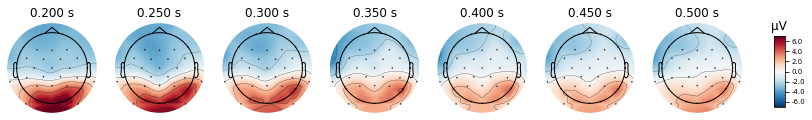

Identifying common channels ...


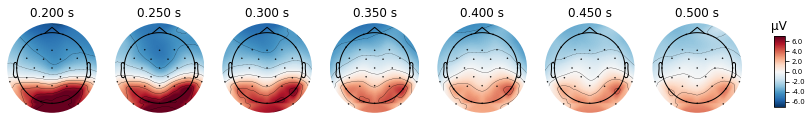

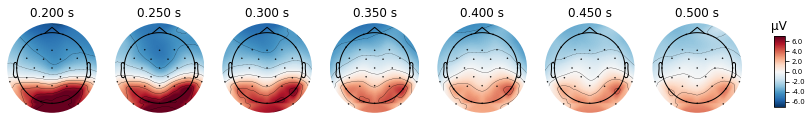

In [8]:
times = np.arange(0.200, 0.550, 0.05)
mne.grand_average(all_evokeds_interv_1_gng[3]).plot_topomap(times, vmin=-7, vmax=7)
mne.grand_average(all_evokeds_interv_2_gng[3]).plot_topomap(times, vmin=-7, vmax=7)

combining channels using "mean"
combining channels using "mean"
combining channels using "mean"


<ipython-input-26-8fb6f0870782>:7: RuntimeWarning: Only 1 channel in "picks"; cannot combine by method "mean".
  ci=.95


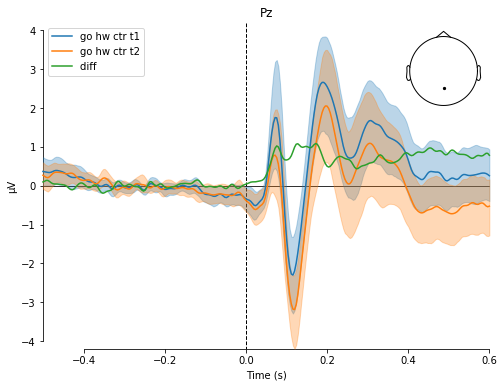

[<Figure size 576x432 with 2 Axes>]

In [26]:
mne.viz.plot_compare_evokeds(
                {'go hw ctr t1':all_evokeds_control_1_gng[3], 
                 'go hw ctr t2':all_evokeds_control_2_gng[3], 
                 'diff ': go_hw_control_diff  }, 
                picks=['Pz'],
                 combine='mean', 
                 ci=.95
                )

combining channels using "mean"
combining channels using "mean"
combining channels using "mean"


<ipython-input-27-98b2007610b0>:7: RuntimeWarning: Only 1 channel in "picks"; cannot combine by method "mean".
  ci=.95


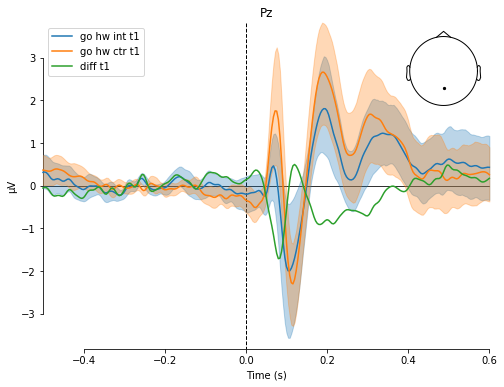

[<Figure size 576x432 with 2 Axes>]

In [27]:
mne.viz.plot_compare_evokeds(
                {'go hw int t1':all_evokeds_interv_1_gng[3], 
                 'go hw ctr t1':all_evokeds_control_1_gng[3], 
                 'diff t1': go_hw_diff_t1  }, 
                picks=[ 'Pz'],
                 combine='mean', 
                 ci=.95
                )

combining channels using "mean"
combining channels using "mean"
combining channels using "mean"


<ipython-input-30-8eaa91a7c588>:7: RuntimeWarning: Only 1 channel in "picks"; cannot combine by method "mean".
  ci=.95


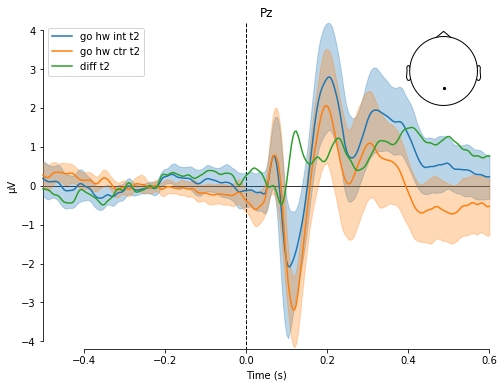

[<Figure size 576x432 with 2 Axes>]

In [30]:
mne.viz.plot_compare_evokeds(
                {'go hw int t2':all_evokeds_interv_2_gng[3], 
                 'go hw ctr t2':all_evokeds_control_2_gng[3], 
                 'diff t2': go_hw_diff_t2  }, 
                picks=['Pz'],
                 combine='mean', 
                 ci=.95
                )

Stats P300
------------------

First, put data in a dataframe

In [34]:
#elecs= ['Pz', 'P3', 'P4'] # centroparietal electrodes (no CPz on montage)
index=['time']
all_df=[]

In [35]:
for subj in subject_ids:
    for sess in sessions:
        evokeds= mne.read_evokeds(fname.evoked_gng(subject='sub-'+ str(subj), 
                                                  session='ses-'+str(sess)), 
                                    baseline=(None, 0))
        
        hw_evo=evokeds[3]
        df=[]
        
        df=hw_evo.to_data_frame(index=index)#[elecs]
        df['Subject']=str(subj)
        df['Session']= str(sess)    
        
        if subj in subj_interv:
            df['Groupe'] = 'int'

        elif subj in subj_control:
            df['Groupe'] = 'ctr'
        
        
        all_df.append(df)

Reading /home/claire/Documents/STUDY/EEG-Tobacco/Skyline-EEG-BIDS/derivatives//go_nogo/sub-146/ses-1/eeg//sub-146_ses-1_gng_ave.fif ...
    Found the data of interest:
        t =    -500.00 ...     600.00 ms (nogo-smoking cue)
        0 CTF compensation matrices available
        nave = 70 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =    -500.00 ...     600.00 ms (nogo-hw)
        0 CTF compensation matrices available
        nave = 76 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =    -500.00 ...     600.00 ms (go-smoking cue)
        0 CTF compensation matrices available
        nave = 204 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying base

        nave = 77 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =    -500.00 ...     600.00 ms (nogo-hw)
        0 CTF compensation matrices available
        nave = 81 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =    -500.00 ...     600.00 ms (go-smoking cue)
        0 CTF compensation matrices available
        nave = 200 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =    -500.00 ...     600.00 ms (go-hw)
        0 CTF compensation matrices available
        nave = 198 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_pr

        nave = 77 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =    -500.00 ...     600.00 ms (go-smoking cue)
        0 CTF compensation matrices available
        nave = 192 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =    -500.00 ...     600.00 ms (go-hw)
        0 CTF compensation matrices available
        nave = 192 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
Reading /home/claire/Documents/STUDY/EEG-Tobacco/Skyline-EEG-BIDS/derivatives//go_nogo/sub-271/ses-2/eeg//sub-271_ses-2_gng_ave.fif ...
    Found the data of interest:
        t =    -500.00 ...     600.00 ms (nogo-smoking cue)
        0 CTF comp

        nave = 203 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =    -500.00 ...     600.00 ms (go-hw)
        0 CTF compensation matrices available
        nave = 202 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
Reading /home/claire/Documents/STUDY/EEG-Tobacco/Skyline-EEG-BIDS/derivatives//go_nogo/sub-279/ses-2/eeg//sub-279_ses-2_gng_ave.fif ...
    Found the data of interest:
        t =    -500.00 ...     600.00 ms (nogo-smoking cue)
        0 CTF compensation matrices available
        nave = 75 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =    -500.00 ...     600.00 ms (nogo-hw)
        0 CTF compensatio

        nave = 198 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
Reading /home/claire/Documents/STUDY/EEG-Tobacco/Skyline-EEG-BIDS/derivatives//go_nogo/sub-339/ses-2/eeg//sub-339_ses-2_gng_ave.fif ...
    Found the data of interest:
        t =    -500.00 ...     600.00 ms (nogo-smoking cue)
        0 CTF compensation matrices available
        nave = 75 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =    -500.00 ...     600.00 ms (nogo-hw)
        0 CTF compensation matrices available
        nave = 76 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =    -500.00 ...     600.00 ms (go-smoking cue)
        0 CTF com

    Found the data of interest:
        t =    -500.00 ...     600.00 ms (nogo-smoking cue)
        0 CTF compensation matrices available
        nave = 76 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =    -500.00 ...     600.00 ms (nogo-hw)
        0 CTF compensation matrices available
        nave = 80 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =    -500.00 ...     600.00 ms (go-smoking cue)
        0 CTF compensation matrices available
        nave = 203 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =    -500.00 ...     600.00 ms (go-hw)
        0 CTF compensation

    Found the data of interest:
        t =    -500.00 ...     600.00 ms (nogo-hw)
        0 CTF compensation matrices available
        nave = 82 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =    -500.00 ...     600.00 ms (go-smoking cue)
        0 CTF compensation matrices available
        nave = 204 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =    -500.00 ...     600.00 ms (go-hw)
        0 CTF compensation matrices available
        nave = 203 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
Reading /home/claire/Documents/STUDY/EEG-Tobacco/Skyline-EEG-BIDS/derivatives//go_nogo/sub-487/ses-1/eeg//sub-487_ses

    Found the data of interest:
        t =    -500.00 ...     600.00 ms (go-smoking cue)
        0 CTF compensation matrices available
        nave = 197 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =    -500.00 ...     600.00 ms (go-hw)
        0 CTF compensation matrices available
        nave = 196 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
Reading /home/claire/Documents/STUDY/EEG-Tobacco/Skyline-EEG-BIDS/derivatives//go_nogo/sub-545/ses-1/eeg//sub-545_ses-1_gng_ave.fif ...
    Found the data of interest:
        t =    -500.00 ...     600.00 ms (nogo-smoking cue)
        0 CTF compensation matrices available
        nave = 70 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying basel

    Found the data of interest:
        t =    -500.00 ...     600.00 ms (go-hw)
        0 CTF compensation matrices available
        nave = 196 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
Reading /home/claire/Documents/STUDY/EEG-Tobacco/Skyline-EEG-BIDS/derivatives//go_nogo/sub-577/ses-1/eeg//sub-577_ses-1_gng_ave.fif ...
    Found the data of interest:
        t =    -500.00 ...     600.00 ms (nogo-smoking cue)
        0 CTF compensation matrices available
        nave = 65 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =    -500.00 ...     600.00 ms (nogo-hw)
        0 CTF compensation matrices available
        nave = 72 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline corr

Reading /home/claire/Documents/STUDY/EEG-Tobacco/Skyline-EEG-BIDS/derivatives//go_nogo/sub-608/ses-1/eeg//sub-608_ses-1_gng_ave.fif ...
    Found the data of interest:
        t =    -500.00 ...     600.00 ms (nogo-smoking cue)
        0 CTF compensation matrices available
        nave = 80 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =    -500.00 ...     600.00 ms (nogo-hw)
        0 CTF compensation matrices available
        nave = 77 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =    -500.00 ...     600.00 ms (go-smoking cue)
        0 CTF compensation matrices available
        nave = 191 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying base

        nave = 71 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =    -500.00 ...     600.00 ms (nogo-hw)
        0 CTF compensation matrices available
        nave = 75 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =    -500.00 ...     600.00 ms (go-smoking cue)
        0 CTF compensation matrices available
        nave = 200 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =    -500.00 ...     600.00 ms (go-hw)
        0 CTF compensation matrices available
        nave = 192 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_pr

        nave = 77 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =    -500.00 ...     600.00 ms (go-smoking cue)
        0 CTF compensation matrices available
        nave = 198 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =    -500.00 ...     600.00 ms (go-hw)
        0 CTF compensation matrices available
        nave = 200 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
Reading /home/claire/Documents/STUDY/EEG-Tobacco/Skyline-EEG-BIDS/derivatives//go_nogo/sub-703/ses-2/eeg//sub-703_ses-2_gng_ave.fif ...
    Found the data of interest:
        t =    -500.00 ...     600.00 ms (nogo-smoking cue)
        0 CTF comp

        nave = 190 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =    -500.00 ...     600.00 ms (go-hw)
        0 CTF compensation matrices available
        nave = 193 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
Reading /home/claire/Documents/STUDY/EEG-Tobacco/Skyline-EEG-BIDS/derivatives//go_nogo/sub-743/ses-2/eeg//sub-743_ses-2_gng_ave.fif ...
    Found the data of interest:
        t =    -500.00 ...     600.00 ms (nogo-smoking cue)
        0 CTF compensation matrices available
        nave = 72 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =    -500.00 ...     600.00 ms (nogo-hw)
        0 CTF compensatio

        nave = 202 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
Reading /home/claire/Documents/STUDY/EEG-Tobacco/Skyline-EEG-BIDS/derivatives//go_nogo/sub-753/ses-2/eeg//sub-753_ses-2_gng_ave.fif ...
    Found the data of interest:
        t =    -500.00 ...     600.00 ms (nogo-smoking cue)
        0 CTF compensation matrices available
        nave = 75 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =    -500.00 ...     600.00 ms (nogo-hw)
        0 CTF compensation matrices available
        nave = 77 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =    -500.00 ...     600.00 ms (go-smoking cue)
        0 CTF com

    Found the data of interest:
        t =    -500.00 ...     600.00 ms (nogo-smoking cue)
        0 CTF compensation matrices available
        nave = 77 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =    -500.00 ...     600.00 ms (nogo-hw)
        0 CTF compensation matrices available
        nave = 80 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =    -500.00 ...     600.00 ms (go-smoking cue)
        0 CTF compensation matrices available
        nave = 197 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =    -500.00 ...     600.00 ms (go-hw)
        0 CTF compensation

In [36]:
# concatenate all dataframe
all_df=pd.concat(all_df)

#reset index to get time in a column
all_df = all_df.reset_index()

In [37]:
all_df

channel,time,Fp1,Fp2,F7,F3,Fz,F4,F8,FC5,FC1,...,P4,P8,PO9,O1,Oz,O2,PO10,Subject,Session,Groupe
0,-500,-0.843443,-0.034798,-0.562799,-1.173717,-0.607177,-0.368199,-0.320043,0.204855,-0.012079,...,-0.021861,-0.003762,0.314945,0.375311,0.072891,0.149444,-0.163581,146,1,int
1,-496,-0.973921,-0.051994,-0.770708,-1.088734,-0.620059,-0.397003,-0.418899,0.174696,0.059466,...,0.200479,0.210454,-0.028863,0.241765,0.058052,0.296849,-0.148713,146,1,int
2,-492,-1.145505,-0.158090,-0.916187,-1.168327,-0.775653,-0.515767,-0.555986,0.023436,0.041328,...,0.446271,0.485835,-0.204766,0.330985,0.282092,0.662121,-0.240557,146,1,int
3,-488,-1.300561,-0.333193,-0.959965,-1.401455,-1.047232,-0.687021,-0.650314,-0.188093,-0.090592,...,0.675346,0.746729,-0.166695,0.581605,0.638218,1.086750,-0.458993,146,1,int
4,-484,-1.377749,-0.479538,-0.950494,-1.634681,-1.306235,-0.794860,-0.633290,-0.328918,-0.263174,...,0.853013,0.914896,-0.045535,0.774784,0.871795,1.342717,-0.711971,146,1,int
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24283,584,-2.550178,-2.157990,-2.604076,-1.922503,-1.504788,-1.324808,-1.998676,-1.557404,-0.654568,...,1.683735,1.044557,0.745451,3.038396,2.642368,2.507069,0.493419,786,2,int
24284,588,-2.499169,-1.949079,-2.545182,-1.955431,-1.509163,-1.310711,-1.566637,-1.614893,-0.738090,...,1.550923,0.945693,0.968337,3.058483,2.674325,2.371113,0.417226,786,2,int
24285,592,-2.481986,-1.823482,-2.660304,-1.998478,-1.540855,-1.290356,-1.237399,-1.654461,-0.822199,...,1.549024,0.949453,1.094433,3.119137,2.732199,2.328512,0.373969,786,2,int
24286,596,-2.464541,-1.808996,-2.846573,-2.050672,-1.569103,-1.210266,-0.994899,-1.669084,-0.887388,...,1.613669,0.985964,1.087442,3.151871,2.779752,2.378847,0.349655,786,2,int


In [38]:
all_df['Subject']=all_df.Subject.astype('str')
all_df['Session']=all_df.Session.astype('str')
all_df['Groupe']=all_df.Groupe.astype('str')

In [42]:
# select P300 time window
all_df_p3 = all_df[(all_df['time']>=300) & (all_df['time']<=500)]

In [43]:
pg.normality(all_df_p3, group='Groupe', dv='Pz')

,W,pval,normal
int,0.987530,4.381204e-13,False
ctr,0.984552,7.035862e-15,False


In [49]:
all_df_p3.to_csv('p3_go.csv')

Text(0.5, 1.0, 'P3 amplitude on Pz')

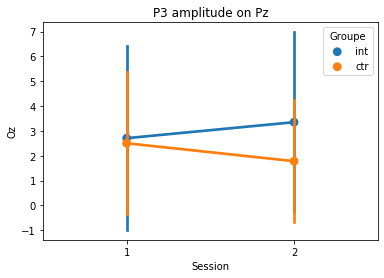

In [47]:
fig = sns.pointplot(data=all_df_p3, x= 'Session', y='Oz', ci='sd', hue='Groupe')

fig.set_title('P3 amplitude on Pz')

Gets individual max amplitude for P3
-----------

In [81]:
all_peak_amplitude = []
all_peak_latency = []
all_channel = []
all_subj = []
all_cond = []
all_sess = []
tmin, tmax=0.3, 0.5
elec='Pz'

for subj in subject_ids:
    for sess in sessions:
        evokeds= mne.read_evokeds(fname.evoked_gng(subject='sub-'+ str(subj), 
                                                  session='ses-'+str(sess)), 
                                    baseline=(None, 0))

        erp=evokeds[3]


        all_subj.append(str(subj))
        all_sess.append(str((sess)))    
        if subj in subj_interv:
                all_cond.append('int')

        elif subj in subj_control:
                all_cond.append('ctr')




        # get peak latency and amplitude
        channel,latency, amplitude= erp.pick(elec).get_peak(tmin=tmin, tmax=tmax,
                                                   mode='pos',  
                                                   return_amplitude=True) 
        #channel,  latency, amplitude= erp.get_peak(tmin=tmin, tmax=tmax,
        #                                           mode='neg',  
        #                                           return_amplitude=True) 
        all_channel.append(channel)
        all_peak_amplitude.append(amplitude)
        all_peak_latency.append(latency)







Reading /home/claire/Documents/STUDY/EEG-Tobacco/Skyline-EEG-BIDS/derivatives//go_nogo/sub-146/ses-1/eeg//sub-146_ses-1_gng_ave.fif ...
    Found the data of interest:
        t =    -500.00 ...     600.00 ms (nogo-smoking cue)
        0 CTF compensation matrices available
        nave = 70 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =    -500.00 ...     600.00 ms (nogo-hw)
        0 CTF compensation matrices available
        nave = 76 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =    -500.00 ...     600.00 ms (go-smoking cue)
        0 CTF compensation matrices available
        nave = 204 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying base

        nave = 77 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =    -500.00 ...     600.00 ms (nogo-hw)
        0 CTF compensation matrices available
        nave = 81 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =    -500.00 ...     600.00 ms (go-smoking cue)
        0 CTF compensation matrices available
        nave = 200 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =    -500.00 ...     600.00 ms (go-hw)
        0 CTF compensation matrices available
        nave = 198 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_pr

        nave = 77 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =    -500.00 ...     600.00 ms (go-smoking cue)
        0 CTF compensation matrices available
        nave = 192 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =    -500.00 ...     600.00 ms (go-hw)
        0 CTF compensation matrices available
        nave = 192 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
Reading /home/claire/Documents/STUDY/EEG-Tobacco/Skyline-EEG-BIDS/derivatives//go_nogo/sub-271/ses-2/eeg//sub-271_ses-2_gng_ave.fif ...
    Found the data of interest:
        t =    -500.00 ...     600.00 ms (nogo-smoking cue)
        0 CTF comp

        nave = 203 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =    -500.00 ...     600.00 ms (go-hw)
        0 CTF compensation matrices available
        nave = 202 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
Reading /home/claire/Documents/STUDY/EEG-Tobacco/Skyline-EEG-BIDS/derivatives//go_nogo/sub-279/ses-2/eeg//sub-279_ses-2_gng_ave.fif ...
    Found the data of interest:
        t =    -500.00 ...     600.00 ms (nogo-smoking cue)
        0 CTF compensation matrices available
        nave = 75 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =    -500.00 ...     600.00 ms (nogo-hw)
        0 CTF compensatio

        nave = 198 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
Reading /home/claire/Documents/STUDY/EEG-Tobacco/Skyline-EEG-BIDS/derivatives//go_nogo/sub-339/ses-2/eeg//sub-339_ses-2_gng_ave.fif ...
    Found the data of interest:
        t =    -500.00 ...     600.00 ms (nogo-smoking cue)
        0 CTF compensation matrices available
        nave = 75 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =    -500.00 ...     600.00 ms (nogo-hw)
        0 CTF compensation matrices available
        nave = 76 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =    -500.00 ...     600.00 ms (go-smoking cue)
        0 CTF com

    Found the data of interest:
        t =    -500.00 ...     600.00 ms (nogo-smoking cue)
        0 CTF compensation matrices available
        nave = 76 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =    -500.00 ...     600.00 ms (nogo-hw)
        0 CTF compensation matrices available
        nave = 80 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =    -500.00 ...     600.00 ms (go-smoking cue)
        0 CTF compensation matrices available
        nave = 203 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =    -500.00 ...     600.00 ms (go-hw)
        0 CTF compensation

    Found the data of interest:
        t =    -500.00 ...     600.00 ms (nogo-hw)
        0 CTF compensation matrices available
        nave = 82 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =    -500.00 ...     600.00 ms (go-smoking cue)
        0 CTF compensation matrices available
        nave = 204 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =    -500.00 ...     600.00 ms (go-hw)
        0 CTF compensation matrices available
        nave = 203 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
Reading /home/claire/Documents/STUDY/EEG-Tobacco/Skyline-EEG-BIDS/derivatives//go_nogo/sub-487/ses-1/eeg//sub-487_ses

    Found the data of interest:
        t =    -500.00 ...     600.00 ms (go-smoking cue)
        0 CTF compensation matrices available
        nave = 197 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =    -500.00 ...     600.00 ms (go-hw)
        0 CTF compensation matrices available
        nave = 196 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
Reading /home/claire/Documents/STUDY/EEG-Tobacco/Skyline-EEG-BIDS/derivatives//go_nogo/sub-545/ses-1/eeg//sub-545_ses-1_gng_ave.fif ...
    Found the data of interest:
        t =    -500.00 ...     600.00 ms (nogo-smoking cue)
        0 CTF compensation matrices available
        nave = 70 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying basel

    Found the data of interest:
        t =    -500.00 ...     600.00 ms (go-hw)
        0 CTF compensation matrices available
        nave = 196 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
Reading /home/claire/Documents/STUDY/EEG-Tobacco/Skyline-EEG-BIDS/derivatives//go_nogo/sub-577/ses-1/eeg//sub-577_ses-1_gng_ave.fif ...
    Found the data of interest:
        t =    -500.00 ...     600.00 ms (nogo-smoking cue)
        0 CTF compensation matrices available
        nave = 65 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =    -500.00 ...     600.00 ms (nogo-hw)
        0 CTF compensation matrices available
        nave = 72 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline corr

Reading /home/claire/Documents/STUDY/EEG-Tobacco/Skyline-EEG-BIDS/derivatives//go_nogo/sub-608/ses-1/eeg//sub-608_ses-1_gng_ave.fif ...
    Found the data of interest:
        t =    -500.00 ...     600.00 ms (nogo-smoking cue)
        0 CTF compensation matrices available
        nave = 80 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =    -500.00 ...     600.00 ms (nogo-hw)
        0 CTF compensation matrices available
        nave = 77 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =    -500.00 ...     600.00 ms (go-smoking cue)
        0 CTF compensation matrices available
        nave = 191 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying base

        nave = 71 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =    -500.00 ...     600.00 ms (nogo-hw)
        0 CTF compensation matrices available
        nave = 75 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =    -500.00 ...     600.00 ms (go-smoking cue)
        0 CTF compensation matrices available
        nave = 200 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =    -500.00 ...     600.00 ms (go-hw)
        0 CTF compensation matrices available
        nave = 192 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_pr

        nave = 77 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =    -500.00 ...     600.00 ms (go-smoking cue)
        0 CTF compensation matrices available
        nave = 198 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =    -500.00 ...     600.00 ms (go-hw)
        0 CTF compensation matrices available
        nave = 200 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
Reading /home/claire/Documents/STUDY/EEG-Tobacco/Skyline-EEG-BIDS/derivatives//go_nogo/sub-703/ses-2/eeg//sub-703_ses-2_gng_ave.fif ...
    Found the data of interest:
        t =    -500.00 ...     600.00 ms (nogo-smoking cue)
        0 CTF comp

        nave = 190 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =    -500.00 ...     600.00 ms (go-hw)
        0 CTF compensation matrices available
        nave = 193 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
Reading /home/claire/Documents/STUDY/EEG-Tobacco/Skyline-EEG-BIDS/derivatives//go_nogo/sub-743/ses-2/eeg//sub-743_ses-2_gng_ave.fif ...
    Found the data of interest:
        t =    -500.00 ...     600.00 ms (nogo-smoking cue)
        0 CTF compensation matrices available
        nave = 72 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =    -500.00 ...     600.00 ms (nogo-hw)
        0 CTF compensatio

        nave = 202 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
Reading /home/claire/Documents/STUDY/EEG-Tobacco/Skyline-EEG-BIDS/derivatives//go_nogo/sub-753/ses-2/eeg//sub-753_ses-2_gng_ave.fif ...
    Found the data of interest:
        t =    -500.00 ...     600.00 ms (nogo-smoking cue)
        0 CTF compensation matrices available
        nave = 75 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =    -500.00 ...     600.00 ms (nogo-hw)
        0 CTF compensation matrices available
        nave = 77 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =    -500.00 ...     600.00 ms (go-smoking cue)
        0 CTF com

    Found the data of interest:
        t =    -500.00 ...     600.00 ms (nogo-smoking cue)
        0 CTF compensation matrices available
        nave = 77 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =    -500.00 ...     600.00 ms (nogo-hw)
        0 CTF compensation matrices available
        nave = 80 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =    -500.00 ...     600.00 ms (go-smoking cue)
        0 CTF compensation matrices available
        nave = 197 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =    -500.00 ...     600.00 ms (go-hw)
        0 CTF compensation

In [89]:
df_p3= pd.DataFrame(list(zip(all_subj, 
                               all_cond,
                               all_sess,
                               all_channel, 
                               all_peak_amplitude, 
                               all_peak_latency)), 
                     columns=['Subject', 'Group', 'Session', 'Channel', 'P3amp', 'P3lat'])

In [90]:
df_p3.to_csv('max_amp_p3_long2.csv')

In [66]:

# convert to long format
df_p3_long=pd.wide_to_long(df_p3,['ctr', 'int'], i ='Subject', j='Session')

df_p3_long=pd.melt(df_p3_long.reset_index(), id_vars=['Subject', 'Session'],
                  value_vars=['ctr', 'int'], 
                  var_name='Groupe',
                  value_name='Pz')

In [69]:
df_p3_long.to_csv('max_amp_p3_long.csv')